IA & Data science -- 2017-2018
--------
*&copy; Equipe pédagogique: Ludovic Denoyer, Thibault Laugel, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander*

# TD-TME07: algorithmes d'apprentissage non-supervisé

L'objectif de ce TP est d'implémenter des algorithmes d'apprentissage non-supervisé (cf. cours 8), en particulier, l'algorithme de classification hiérarchique.

<font size="+1">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

ZHONG_YUCHEN

## Questions de cours (à faire chez vous, sur papier)

Pour vous entraîner sans machine...

**[Q]** Montrer que la distance de Manhattan est bien une mesure de distance.

**[Q]** Dans le cours, 4 approches possibles ont été données afin de calculer la distance entre 2 groupes :
- l'approche du chaînage minimum est appelée "simple linkage"
- l'approche du chaînage maximum, est appelée "complete linkage"
- l'approche du chaînage moyenne est appelée "average linkage"
- l'approche du par centre de gravité est appelée "centroid linkage"

On considère une mesure de distance $d$. Soit $A =\{a_1,a_2,...,a_{|A|}\}$ et $B =\{b_1,b_2,...,b_{|B|}\}$ deux groupes d'exemples. Donner l'expression de la distance entre $A$ et $B$ pour chacune des approches.


**[Q]** En utilisant la distance euclidienne et l'approche "centroid linkage", appliquer, "à la main", l'algorithme de clustering hiérarchique, méthode par agglomération, sur les données fournies sur le transparent 10 du cours 2 (coin haut gauche). Dans cette page, les données correspondent à 9 points dans un espace 2D: $X_1 \times X_2$. Le point 1 est le point de coordonnées $(-0.5, -1.0)$, etc. 
Construire le dendrogramme correspondant.

rem : dans la page du cours, les 3 premiers clusters construits sont donnés.




## Préparation

Avant de commencer, exécuter le bloc suivant afin de pouvoir initialiser des variables utiles :

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

## Travail à réaliser

Le travail à faire se décompose en 2 phases :
- dans un premier temps, le travail porte sur la base d'apprentissage "base-2D.csv" qui contient des exemples décrits dans $R^2$. Ainsi, il est plus aisé de visualiser les résultats des fonctions à écrire ;
- dans un second temps, les fonctions écrites dans la phase précédente sont à utiliser avec la base d'apprentissage "base-Paris.csv".

**Attention**: vos fonctions doivent **dès leur création** pouvoir s'appliquer **quelle que soit la dimension** des exemples traités.

## Phase 1: implémentation des fonctions de base

### Chargement du fichier "base_2D.csv"

La lecture d'un fichier CSV par <code>pd.read()</code> fournit un <code>DataFrame</code> que vous avez appris à manipuler dans les TP précédent.

In [2]:
# Par exemple:
data_2D = pd.read_csv("data/base-2D.csv")
print("Il y a", len(data_2D), "exemples dans la base.")

Il y a 14 exemples dans la base.


Une fois chargée, on peut afficher le contenu de la base d'apprentissage :

In [3]:
data_2D.head(-1)

,X,Y
0,0.0,4.0
1,1.0,3.5
2,1.0,1.0
3,2.0,1.0
4,2.0,2.0
5,4.0,4.0
6,4.0,5.0
7,4.0,6.0
8,4.5,1.0
9,4.5,6.0


**[Q]** Exécuter le code suivant qui permet de réaliser une représentation graphique de cette base d'apprentissage.


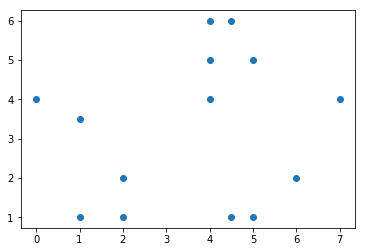

In [4]:
M_data2D= data_2D.as_matrix()      # conversion du DataFrame en matrice pour la commande suivante
colonne_X= M_data2D[0: , 0]        # récupération des valeurs de la première colonne
colonne_Y= M_data2D[0: , 1]        # récupération des valeurs de la deuxième colonne
plt.scatter(colonne_X, colonne_Y)  # affichage des points

*Rappel*: la librairie <code>pandas</code> permet de connaître le minimum et le maximum d'un <code>DataFrame</code>, par exemple:


In [395]:
M_data2D[:,0]

array([0.        , 0.14285714, 0.14285714, 0.28571429, 0.28571429,
       0.57142857, 0.57142857, 0.57142857, 0.64285714, 0.64285714,
       0.71428571, 0.71428571, 0.85714286, 1.        ])

In [11]:
# data_2D est le DataFrame dans lequel le fichier "base-2D.csv" a été chargé
for e in data_2D.columns:
    print("colonne", e, ":", data_2D[e].min(), data_2D[e].max())


colonne X : 0.0 7.0
colonne Y : 1.0 6.0


Index(['X', 'Y'], dtype='object')

## Fonctions préliminaires

### Normalisation des données

**[Q]** Ecrire la fonction <code>normalisation()</code> qui prend en argument un <code>DataFrame</code> et rend la matrice obtenue en normalisant chaque colonne de ce <code>DataFrame</code> en appliquant la normalisation vue en cours.


In [16]:
def normalisation(df):
    M_df = df.as_matrix()
    for index,val in enumerate(df.columns):
        M_df[:,index] = (M_df[:,index]-df[val].min())/(df[val].max()-df[val].min())
    return M_df

M_data2D = normalisation(data_2D)
print(M_data2D)


[[0.         0.6       ]
 [0.14285714 0.5       ]
 [0.14285714 0.        ]
 [0.28571429 0.        ]
 [0.28571429 0.2       ]
 [0.57142857 0.6       ]
 [0.57142857 0.8       ]
 [0.57142857 1.        ]
 [0.64285714 0.        ]
 [0.64285714 1.        ]
 [0.71428571 0.        ]
 [0.71428571 0.8       ]
 [0.85714286 0.2       ]
 [1.         0.6       ]]


**[Q]** Une fois la fonction de normalisation écrite, normaliser les données de la base-2D et afficher leur représentation graphique: vérifier que le tracé est le même que celui obtenu avant la normalisation (aux valeurs des axes près).

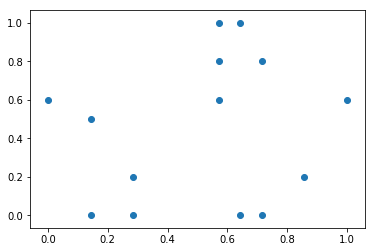

In [17]:
colonne_X= M_data2D[0: , 0]        # récupération des valeurs de la première colonne
colonne_Y= M_data2D[0: , 1]        # récupération des valeurs de la deuxième colonne
plt.scatter(colonne_X, colonne_Y)  # affichage des points

### Distances entre exemples

**[Q]** Ecrire la fonction <code>dist_euclidienne_vect()</code> qui prend en argument deux exemples et rend leur distance euclidienne. 

In [18]:
def dist_euclidienne_vect(v1,v2):
    return np.sqrt(sum(np.square(v1-v2)))

In [19]:
# Exemple d'utilisation sur les 2 premiers exemples de la base:
v1= M_data2D[0,:]
v2= M_data2D[1,:]
print("v1 : ",v1, "\nv2 : ",v2)

print("distance euclidienne entre v1 et v2 : ", dist_euclidienne_vect(v1,v2))

v1 :  [0.  0.6] 
v2 :  [0.14285714 0.5       ]
distance euclidienne entre v1 et v2 :  0.17437936593905287


**[Q]** Ecrire la fonction <code>dist_manhattan_vect()</code> qui prend en argument deux exemples et rend leur distance de Manhattan. 

In [20]:
def dist_manhattan_vect(v1,v2):
    return sum(abs(v1-v2));

In [21]:
# Exemple d'utilisation sur les 2 premiers exemples de la base:
v1= M_data2D[0,:]
v2= M_data2D[1,:]
print("v1 : ",v1, "\nv2 : ",v2)

print("distance de Manhattan entre v1 et v2 : ", dist_manhattan_vect(v1,v2))

v1 :  [0.  0.6] 
v2 :  [0.14285714 0.5       ]
distance de Manhattan entre v1 et v2 :  0.24285714285714283


**[Q]** Ecrire la fonction <code>dist_vect()</code> qui prend en argument une chaîne de caractères (soit la chaîne "euclidienne", soit "manhattan") ainsi que deux vecteurs et qui rend leur distance soit euclidienne, soit de Manhattan selon le cas.

In [255]:
def dist_vect(nom_function,v1,v2):
    if(nom_function == "euclidienne"):
        return dist_euclidienne_vect(v1,v2)
    if(nom_function == "manhattan"):
        return dist_manhattan_vect(v1,v2)

In [256]:
v1= M_data2D[0,:]
v2= M_data2D[1,:]
print("v1 : ",v1, "\nv2 : ",v2)

for nom in ["euclidienne", "manhattan"] :
    print("distance ", nom, " entre v1 et v2 :\t", dist_vect(nom,v1,v2))


v1 :  [0.  0.6] 
v2 :  [0.14285714 0.5       ]
distance  euclidienne  entre v1 et v2 :	 0.17437936593905287
distance  manhattan  entre v1 et v2 :	 0.24285714285714283


### Calcul de centroides

**[Q]** Ecrire la fonction <code>centroide()</code> qui, étant donné une matrice représentant plusieurs exemples rend le centroide (calculé en faisant la moyenne de chaque composante des vecteurs de la matrice).
On fait l'hypothèse que la matrice contient toujours au moins un exemple.

In [428]:
def centroide(matrice):
    cen = []
    for n in range(0,matrice.shape[1]):
        cen.append(np.mean(matrice[:,n]))
    return np.array(cen)

In [429]:
M_data2D

array([[0.        , 0.6       ],
       [0.14285714, 0.5       ],
       [0.14285714, 0.        ],
       [0.28571429, 0.        ],
       [0.28571429, 0.2       ],
       [0.57142857, 0.6       ],
       [0.57142857, 0.8       ],
       [0.57142857, 1.        ],
       [0.64285714, 0.        ],
       [0.64285714, 1.        ],
       [0.71428571, 0.        ],
       [0.71428571, 0.8       ],
       [0.85714286, 0.2       ],
       [1.        , 0.6       ]])

In [310]:
centroide(M_data2D)

array([0.51020408, 0.45      ])

### Distances entre groupes d'exemples


La distance entre deux groupes d'exemples correspond à la distance entre leurs centroïdes (approche de type "centroid linkage" vue en cours).

**[Q]** Ecrire la fonction <code>dist_groupes()</code> qui prend en argument une chaîne de caractères (soit "euclidienne", soit "manhattan") ainsi que deux groupes de vecteurs et qui rend leur distance soit euclidienne, soit de Manhattan selon le cas.


In [311]:
def dist_groupes(nom_function,gpV1,gpV2):
    centroide1 = centroide(gpV1)
    centroide2 = centroide(gpV2)
    return dist_vect(nom_function,centroide1,centroide2)

In [312]:
# par exemple :
res=dist_groupes("euclidienne", M_data2D[0:4], M_data2D[5:13])
res

0.586345478713841

## L'algorithme de classification hiérarchique

Dans la suite de cet exercice, une partition (qui est un groupe de clusters) est représentée par une structure de données de type dictionnaire (<code>dict()</code> en python) :
- la clé est un numéro de cluster (sous la forme d'un entier naturel) ;
- la valeur associée est une matrice contenant les exemples qui sont dans le cluster correspondant.

On appelle "partition" un tel dictionnaire.


**[Q]** Ecrire la fonction <code>initialise()</code> qui, étant donné une matrice M d'exemples, rend un dictionnaire contenant autant d'entrées que d'exemples dans M. Dans ce dictionnaire, une clé est numéro d'exemple (un entier compris entre 0 et n-1, le nombre d'exemples) et la valeur associée est une matrice d'exemples contenant un exemple de M.

In [432]:
def initialise(M):
    dist = {}
    for key, val in enumerate(M):
        dist[key] = [val]
    return dist

In [433]:
# Par exemple:
depart = initialise(M_data2D)
# cette partition contient autant de clusters que d'exemples: on a un cluster par exemple.
depart 

{0: [array([0. , 0.6])],
 1: [array([0.14285714, 0.5       ])],
 2: [array([0.14285714, 0.        ])],
 3: [array([0.28571429, 0.        ])],
 4: [array([0.28571429, 0.2       ])],
 5: [array([0.57142857, 0.6       ])],
 6: [array([0.57142857, 0.8       ])],
 7: [array([0.57142857, 1.        ])],
 8: [array([0.64285714, 0.        ])],
 9: [array([0.64285714, 1.        ])],
 10: [array([0.71428571, 0.        ])],
 11: [array([0.71428571, 0.8       ])],
 12: [array([0.85714286, 0.2       ])],
 13: [array([1. , 0.6])]}

### Variante 1: chaînage par centroides

On souhaite implémenter ici l'algorithme de classification hiérarchique basé sur l'utilisation d'un chaînage par centroides (c'est-à-dire que la distance entre 2 groupes d'exemples est la distance entre leurs centroides, c'est l'approche "centroid linkage" vue en cours).

On commence par implémenter une fonction qui, étant donné une partition, permet de regrouper les 2 clusters les plus proches. Ces 2 clusters sont alors fusionnés pour ne former qu'un unique groupe et ils sont retirés de la partition.
On fait l'hypothèse que la partition initiale contient au moins 2 groupes.

**[Q]** Ecrire la fonction <code>fusionne()</code> qui prend en argument un nom de distance ("euclidienne" ou "manhattan") et une partition C0 et qui rend 4 valeurs :
- la partition C1 obtenue après fusion des 2 clusters les plus proches ;
- les clés des 2 clusters de C0 qui ont été fusionnés et qui ont donc aussi été retirés de C1 ;
- la distance qui séparait ces 2 clusters, calculée selon le nom de distance donné.

In [456]:
def centroide(matrice) :
    point = []
    for j in range(len(matrice[0])):
        tmp = 0.0
        for i in range(len(matrice)):
            tmp += matrice[i][j]
        point.append(tmp / float(len(matrice)))
    
    return np.array(point)

In [556]:
matrice1 = [np.array([0.0,0.6])]
matrice2 = np.array([[0.64285714, 0.        ],[0.71428571, 0.        ],[0.0,0.6]])
#centroide(matrice)
print(range(len(matrice1)))
print(range(len(matrice2[0])))
matrice1[0][0]
matrice2[1][0]
print(centroide(matrice1))
centroide(matrice2)

In [565]:
def fusionne(nom_function, C0):
    dist_Min = 100
    key_Min1 = -1
    key_Min2 = -1
    key_Max = -1
    for key,val in C0.items():
        if key > key_Max:
            key_Max = key
        for k, v in [(ke,va) for (ke,va) in C0.items() if(ke>key)]:
            dist = dist_groupes(nom_function,val,v)
            if dist < dist_Min:
                dist_Min = dist
                key_Min1 = key
                key_Min2 = k
    C0[key_Max+1] = np.concatenate([C0.pop(key_Min1),C0.pop(key_Min2)])
    print("Fusion de  {}  et  {}  pour une distance de  {}".format(key_Min1, key_Min2, dist_Min))
    return C0, key_Min1, key_Min2, dist_Min
                    

In [566]:
# Par exemple:
depart = initialise(M_data2D)
fusionne("euclidienne",depart)  

Fusion de  8  et  10  pour une distance de  0.0714285714285714


({0: [array([0. , 0.6])],
  1: [array([0.14285714, 0.5       ])],
  2: [array([0.14285714, 0.        ])],
  3: [array([0.28571429, 0.        ])],
  4: [array([0.28571429, 0.2       ])],
  5: [array([0.57142857, 0.6       ])],
  6: [array([0.57142857, 0.8       ])],
  7: [array([0.57142857, 1.        ])],
  9: [array([0.64285714, 1.        ])],
  11: [array([0.71428571, 0.8       ])],
  12: [array([0.85714286, 0.2       ])],
  13: [array([1. , 0.6])],
  14: array([[0.64285714, 0.        ],
         [0.71428571, 0.        ]])},
 8,
 10,
 0.0714285714285714)

### Construction de dendrogramme

Le dendrogramme permet de visualiser les fusions de clusters réalisés tout au long du déroulement de l'algorithme de clustering hiérarchique.

Pour construire un dendrogramme, il est nécessaire de construire la matrice suivante (que l'on appelle <code>M_Fusion</code> dans ce qui suit): pour chaque ligne, cette matrice contient 4 colonnes :
- les 2 premières colonnes contiennent les clés des groupes fusionnés ;
- la 3e colonne contient la distance qui séparait ces 2 groupes ;
- la 4e colonne contient la valeur 2 (c'est une valeur sans importance pour nous).
 

In [567]:
# Exemple de construction de la matrice M_Fusion en utilisant les fonctions écrites
# dans les questions précédentes

# initialisation 
courant = initialise(M_data2D)       # clustering courant, au départ:s données data_2D normalisées
M_Fusion = []                        # initialisation
while len(courant) >=2:              # tant qu'il y a 2 groupes à fusionner
    new,k1,k2,dist_min = fusionne('euclidienne',courant)
    if(len(M_Fusion)==0):
        M_Fusion = [k1,k2,dist_min,2]
    else:
        M_Fusion = np.vstack( [M_Fusion,[k1,k2,dist_min,2] ])
    courant = new
    
print('\nLa matrice M_Fusion obtenue :\n',M_Fusion)

Fusion de  8  et  10  pour une distance de  0.0714285714285714
Fusion de  7  et  9  pour une distance de  0.07142857142857151
Fusion de  2  et  3  pour une distance de  0.14285714285714285
Fusion de  6  et  11  pour une distance de  0.1428571428571429
Fusion de  0  et  1  pour une distance de  0.17437936593905287
Fusion de  15  et  17  pour une distance de  0.20316375219039837
Fusion de  4  et  16  pour une distance de  0.21237241067597867
Fusion de  12  et  14  pour une distance de  0.26811891970176366
Fusion de  5  et  19  pour une distance de  0.3047456282855976
Fusion de  13  et  22  pour une distance de  0.4542857142857144
Fusion de  20  et  21  pour une distance de  0.5000000000000001
Fusion de  18  et  24  pour une distance de  0.638139657302555
Fusion de  23  et  25  pour une distance de  0.6796842379114776

La matrice M_Fusion obtenue :
 [[ 8.         10.          0.07142857  2.        ]
 [ 7.          9.          0.07142857  2.        ]
 [ 2.          3.          0.14285714  

Une fois la matrice <code>M_Fusion</code> construite, le tracé d'un histogramme s'effectue avec le code suivant :

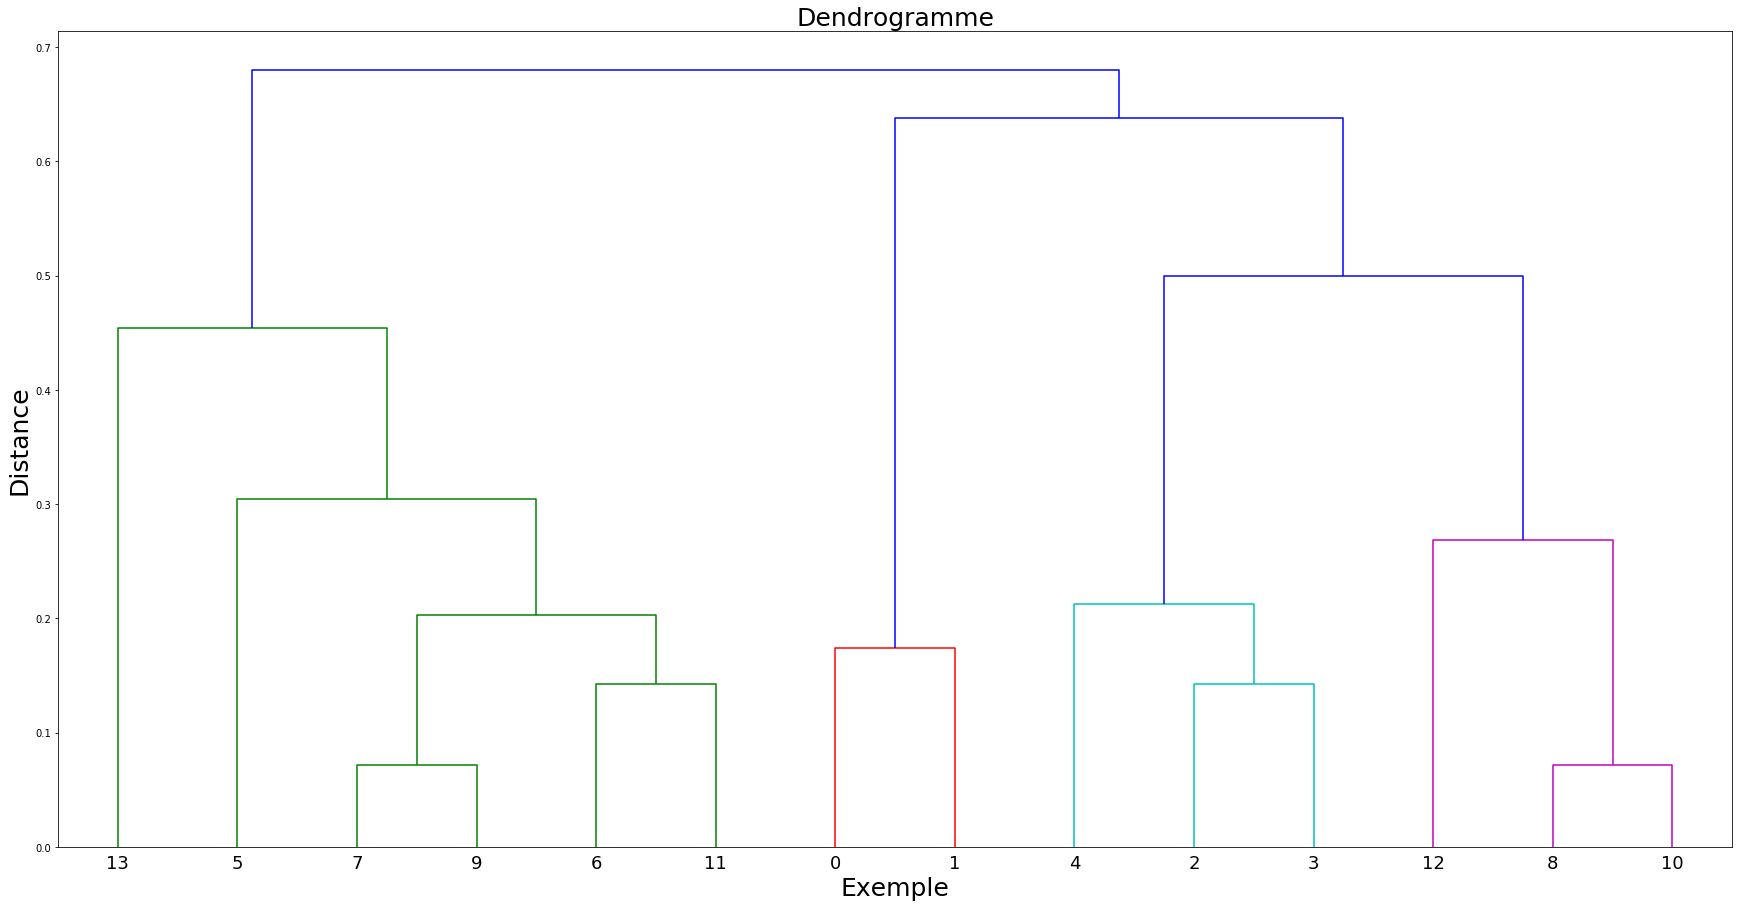

In [568]:
import scipy.cluster.hierarchy

# Paramètre de la fenêtre d'affichage: 
plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
plt.title('Dendrogramme', fontsize=25)    
plt.xlabel('Exemple', fontsize=25)
plt.ylabel('Distance', fontsize=25)

# Construction du dendrogramme à partir de la matrice M_Fusion:
scipy.cluster.hierarchy.dendrogram(
    M_Fusion,
    leaf_font_size=18.,  # taille des caractères de l'axe des X
)

# Affichage du résultat obtenu:
plt.show()

**[Q]** Ecrire la fonction <code>clustering_hierarchique()</code> qui, pour une base d'apprentissage et un nom de distance donné, permet de réaliser un clustering hiérarchique et de tracer le dendrogramme obtenu.

La fonction rend la matrice <code>M_Fusion</code> construite.

Fusion de  8  et  10  pour une distance de  0.0714285714285714
Fusion de  7  et  9  pour une distance de  0.07142857142857151
Fusion de  2  et  3  pour une distance de  0.14285714285714285
Fusion de  6  et  11  pour une distance de  0.1428571428571429
Fusion de  0  et  1  pour une distance de  0.17437936593905287
Fusion de  15  et  17  pour une distance de  0.20316375219039837
Fusion de  4  et  16  pour une distance de  0.21237241067597867
Fusion de  12  et  14  pour une distance de  0.26811891970176366
Fusion de  5  et  19  pour une distance de  0.3047456282855976
Fusion de  13  et  22  pour une distance de  0.4542857142857144
Fusion de  20  et  21  pour une distance de  0.5000000000000001
Fusion de  18  et  24  pour une distance de  0.638139657302555
Fusion de  23  et  25  pour une distance de  0.6796842379114776

La matrice M_Fusion obtenue :
 [[ 8.         10.          0.07142857  2.        ]
 [ 7.          9.          0.07142857  2.        ]
 [ 2.          3.          0.14285714  

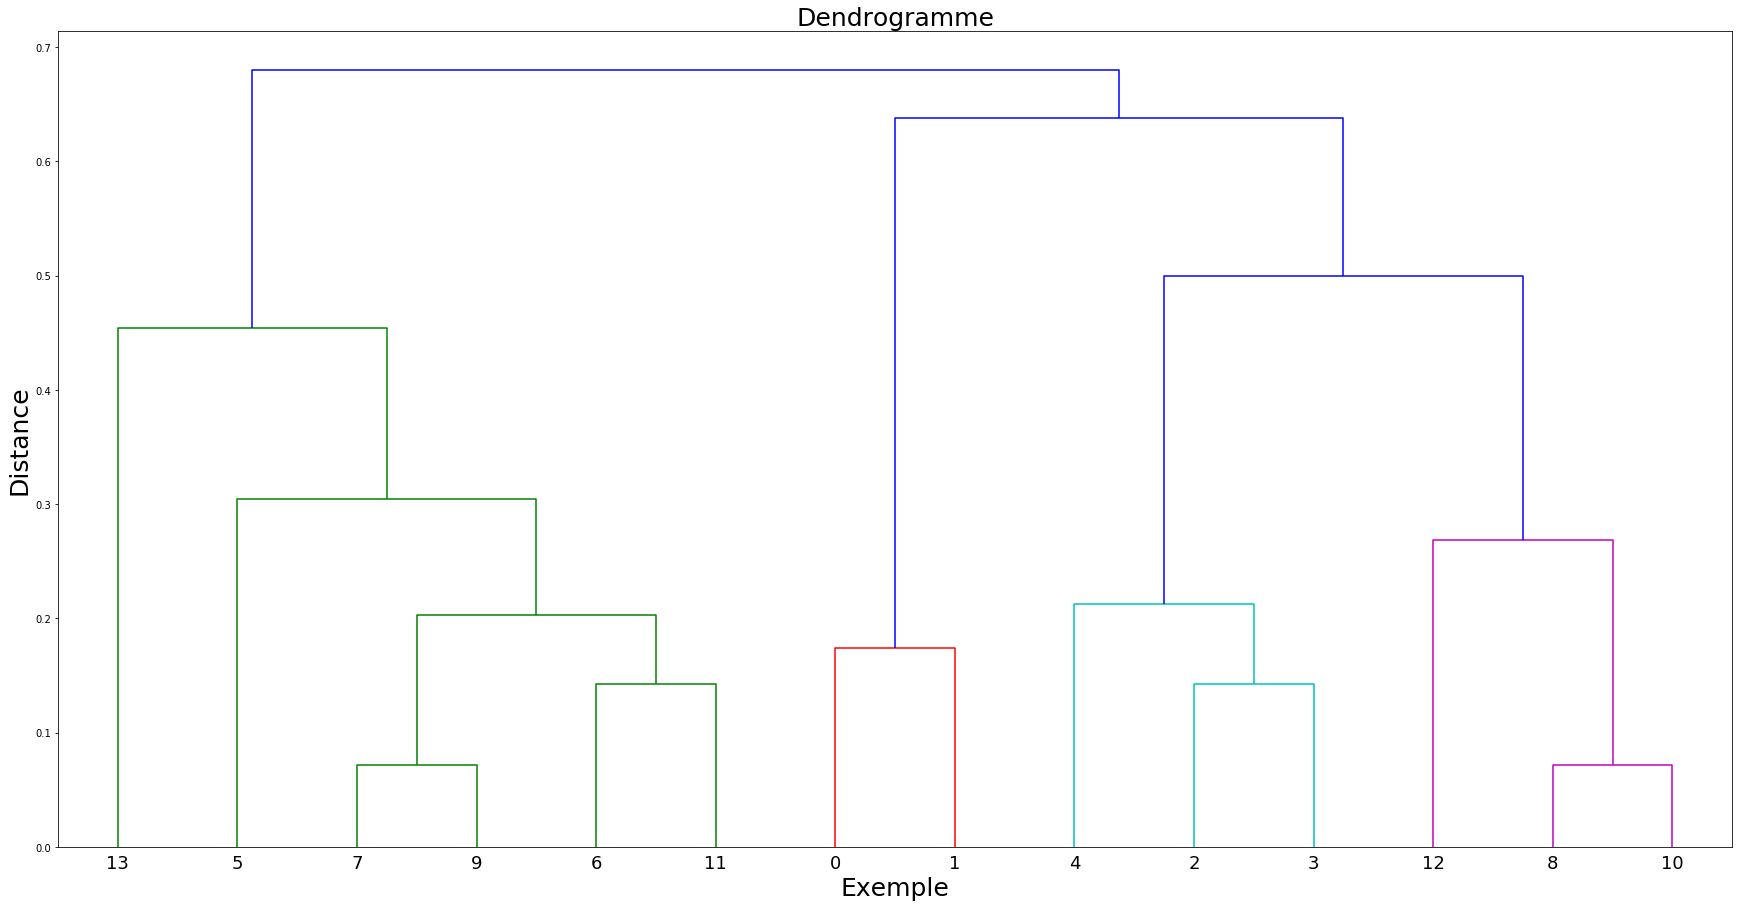

In [569]:
# --------------------------------------------------------
# Rem: pour info, on pourrait obtenir la matrice M_fusion avec scipy:

import scipy.cluster.hierarchy
scipy.cluster.hierarchy.linkage(M_data2D)

# mais on ne l'utilisera pas ici.
# --------------------------------------------------------
def clustering_hierarchique(nom_function,df):
    M_df = normalisation(df)
    courant = initialise(M_df)           # clustering courant, au départ:s données data_2D normalisées
    M_Fusion = []                        # initialisation
    while len(courant) >=2:              # tant qu'il y a 2 groupes à fusionner
        new,k1,k2,dist_min = fusionne(nom_function,courant)
        if(len(M_Fusion)==0):
            M_Fusion = [k1,k2,dist_min,2]
        else:
            M_Fusion = np.vstack( [M_Fusion,[k1,k2,dist_min,2] ])
        courant = new

    print('\nLa matrice M_Fusion obtenue :\n',M_Fusion)
    
        # Paramètre de la fenêtre d'affichage: 
    plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
    plt.title('Dendrogramme', fontsize=25)    
    plt.xlabel('Exemple', fontsize=25)
    plt.ylabel('Distance', fontsize=25)

    # Construction du dendrogramme à partir de la matrice M_Fusion:
    scipy.cluster.hierarchy.dendrogram(
        M_Fusion,
        leaf_font_size=18.,  # taille des caractères de l'axe des X
    )

    # Affichage du résultat obtenu:
    plt.show()

clustering_hierarchique("euclidienne",data_2D)

### Comparaison de distances

**[Q]** Réaliser un clustering en utilisant la distance de Manhattan. Comparer les résultats obtenus avec cette distance avec ceux obtenus avec la distance euclidienne.

Fusion de  8  et  10  pour une distance de  0.0714285714285714
Fusion de  7  et  9  pour une distance de  0.07142857142857151
Fusion de  2  et  3  pour une distance de  0.14285714285714285
Fusion de  6  et  11  pour une distance de  0.1428571428571429
Fusion de  15  et  17  pour une distance de  0.23571428571428554
Fusion de  0  et  1  pour une distance de  0.24285714285714283
Fusion de  4  et  16  pour une distance de  0.27142857142857146
Fusion de  5  et  18  pour une distance de  0.35357142857142854
Fusion de  12  et  14  pour une distance de  0.3785714285714285
Fusion de  20  et  22  pour une distance de  0.5000000000000001
Fusion de  13  et  21  pour une distance de  0.6257142857142859
Fusion de  19  et  24  pour une distance de  0.857142857142857
Fusion de  23  et  25  pour une distance de  0.7095238095238097

La matrice M_Fusion obtenue :
 [[ 8.         10.          0.07142857  2.        ]
 [ 7.          9.          0.07142857  2.        ]
 [ 2.          3.          0.14285714  

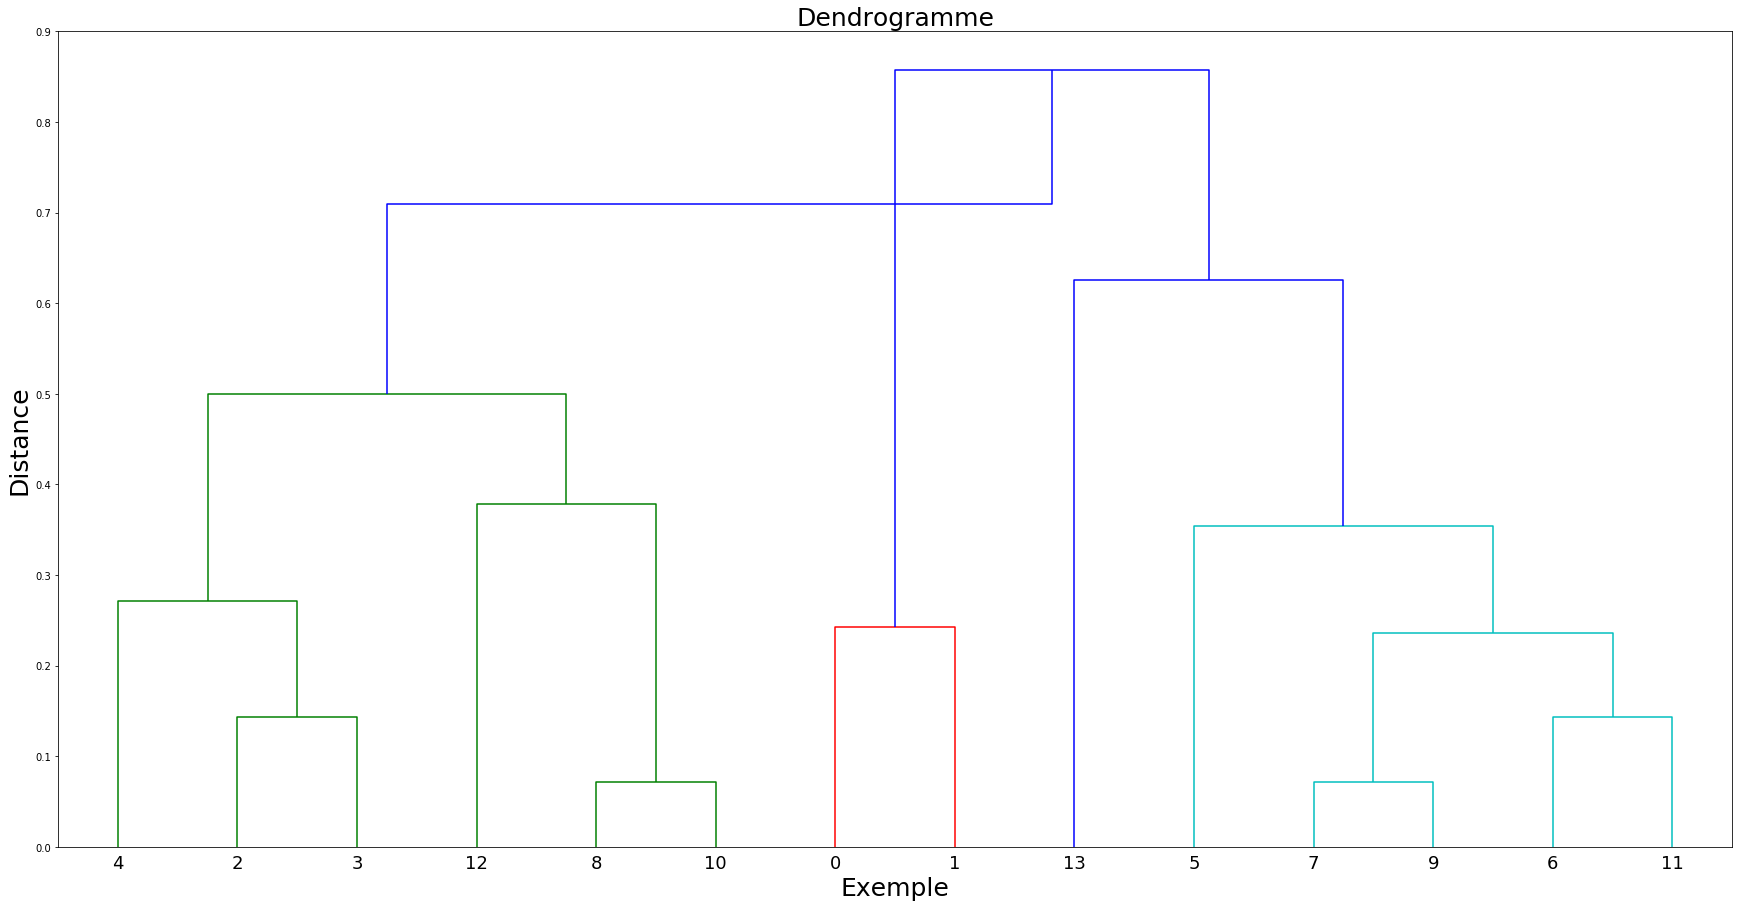

In [570]:
clustering_hierarchique("manhattan",data_2D)

### Variante 2: chaînage complet (maximum des distances)

On considère maintenant l'approche "complete linkage" vue en cours. Dans cette approche, la distance entre deux clusters G1 et G2 est égale à la plus grande distance existante entre un exemple de G1 et un exemple de G2.

**[Q]** Ecrire la fonction <code>dist_max_groupes()</code> qui, étant donné deux clusters, calcule leur distance ainsi définie. Cette fonction prend 3 arguments: un nom de distance à utiliser ("euclidienne" ou "manhattan") et deux clusters.
On fait l'hypothèse que les 2 clusters contiennent au moins un exemple.


In [577]:
def dist_max_groupes(nom_function,C1,C2):
    dist_Max = -1
    key1 = -1
    key2 = -1
    for k1,ex1 in enumerate(C1):
        for k2,ex2 in enumerate(C2):
            dist = dist_vect(nom_function,ex1,ex2)
            if(dist_Max < dist):
                dist_Max = dist
                key1 = k1
                key2 = k2
    return dist_Max

In [578]:
M_data2D[0:5]

array([[0.        , 0.6       ],
       [0.14285714, 0.5       ],
       [0.14285714, 0.        ],
       [0.28571429, 0.        ],
       [0.28571429, 0.2       ]])

In [579]:
dist_max_groupes("euclidienne", M_data2D[0:5], M_data2D[6:13])

1.118033988749895

La distance <code>dist_max_groupes()</code> est utilisée lors d'un clustering hiérarchique basé sur un chaînage complet ("complete linkage") entre les clusters (cf. cours).

**[Q]** Implémenter une variante du clustering hiérarchique qui utilise cette distance.

Fusion de  8  et  10  pour une distance de  0.0714285714285714
Fusion de  7  et  9  pour une distance de  0.07142857142857151
Fusion de  2  et  3  pour une distance de  0.14285714285714285
Fusion de  6  et  11  pour une distance de  0.1428571428571429
Fusion de  0  et  1  pour une distance de  0.17437936593905287
Fusion de  15  et  17  pour une distance de  0.2457807219155036
Fusion de  4  et  16  pour une distance de  0.24578072191550362
Fusion de  12  et  14  pour une distance de  0.2931183504097598
Fusion de  5  et  19  pour une distance de  0.4
Fusion de  13  et  22  pour une distance de  0.5862367008195198
Fusion de  18  et  20  pour une distance de  0.6167723755692258
Fusion de  21  et  23  pour une distance de  0.6982485377057106
Fusion de  24  et  25  pour une distance de  1.0

La matrice M_Fusion obtenue :
 [[ 8.         10.          0.07142857  2.        ]
 [ 7.          9.          0.07142857  2.        ]
 [ 2.          3.          0.14285714  2.        ]
 [ 6.         11.  

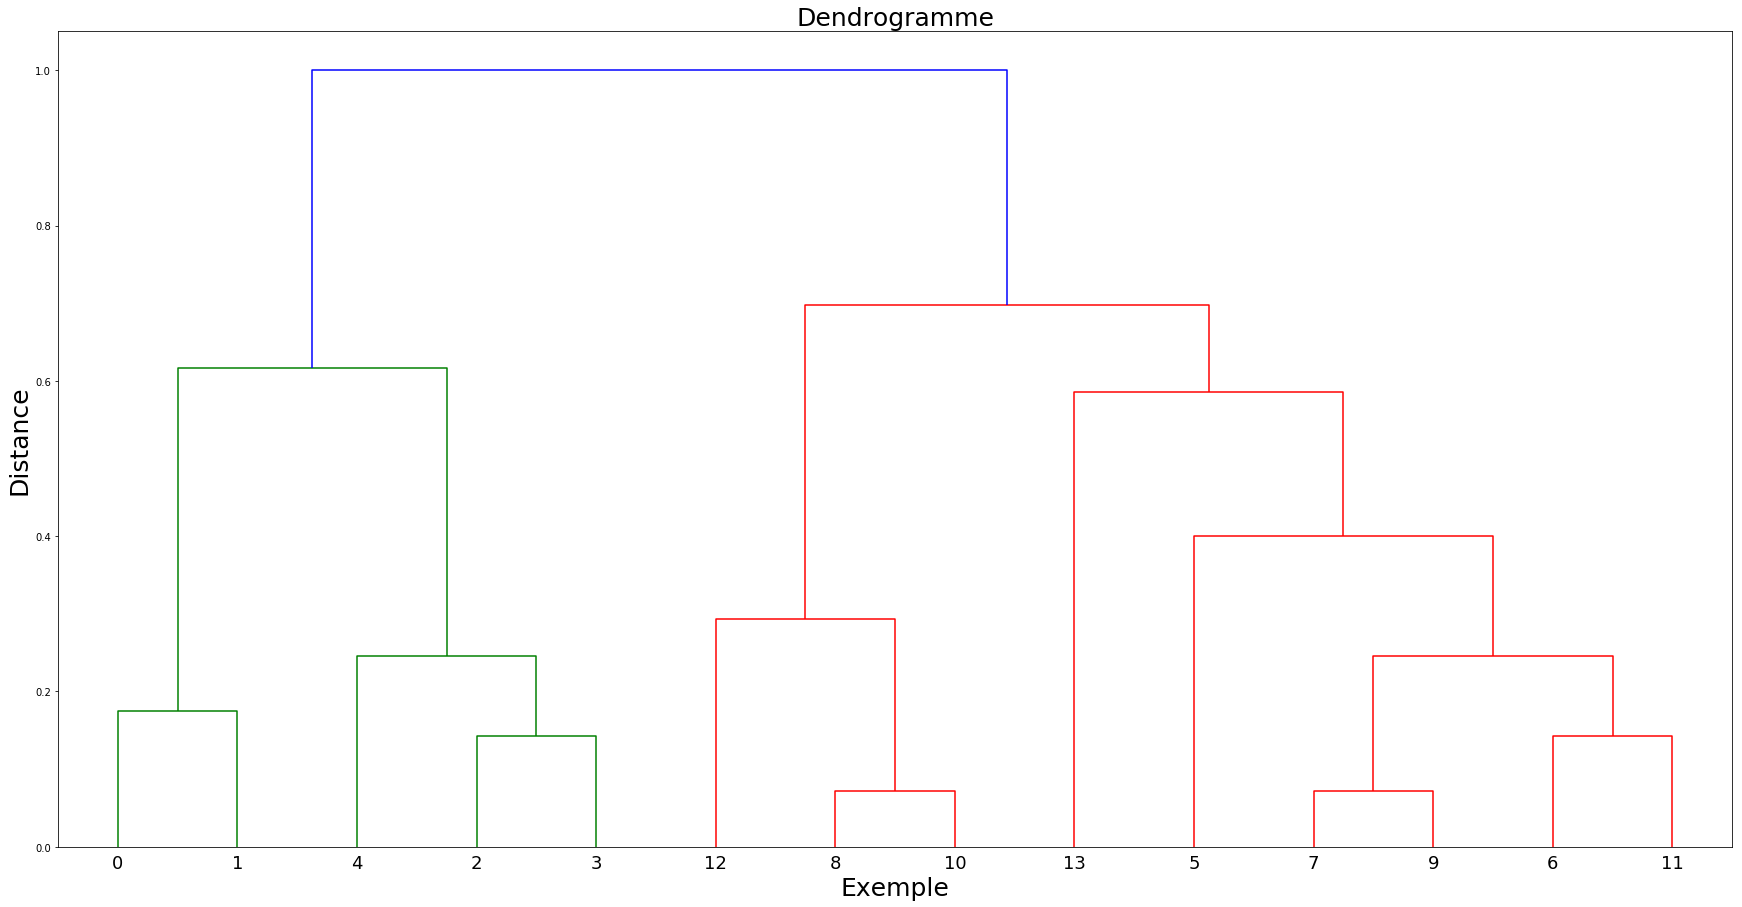

In [580]:
def fusionne2(nom_function, C0):
    dist_Min = 100
    key_Min1 = -1
    key_Min2 = -1
    key_Max = -1
    for key,val in C0.items():
        if key > key_Max:
            key_Max = key
        for k, v in [(ke,va) for (ke,va) in C0.items() if(ke>key)]:
            dist = dist_max_groupes(nom_function,val,v)
            if dist < dist_Min:
                dist_Min = dist
                key_Min1 = key
                key_Min2 = k
    C0[key_Max+1] = np.array([C0.pop(key_Min1)[0],C0.pop(key_Min2)[0]])
    print("Fusion de  {}  et  {}  pour une distance de  {}".format(key_Min1, key_Min2, dist_Min))
    return C0, key_Min1, key_Min2, dist_Min
                    
def clustering_hierarchique2(nom_function,df):
    M_df = normalisation(df)
    courant = initialise(M_df)           # clustering courant, au départ:s données data_2D normalisées
    M_Fusion = []                        # initialisation
    while len(courant) >=2:              # tant qu'il y a 2 groupes à fusionner
        new,k1,k2,dist_min = fusionne2(nom_function,courant)
        if(len(M_Fusion)==0):
            M_Fusion = [k1,k2,dist_min,2]
        else:
            M_Fusion = np.vstack( [M_Fusion,[k1,k2,dist_min,2] ])
        courant = new

    print('\nLa matrice M_Fusion obtenue :\n',M_Fusion)
    
        # Paramètre de la fenêtre d'affichage: 
    plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
    plt.title('Dendrogramme', fontsize=25)    
    plt.xlabel('Exemple', fontsize=25)
    plt.ylabel('Distance', fontsize=25)

    # Construction du dendrogramme à partir de la matrice M_Fusion:
    scipy.cluster.hierarchy.dendrogram(
        M_Fusion,
        leaf_font_size=18.,  # taille des caractères de l'axe des X
    )

    # Affichage du résultat obtenu:
    plt.show()

clustering_hierarchique2("euclidienne",data_2D)

## Phase 2 : application à des données réelles

### Données: traitement des déchets de la ville de Paris

Récupérer les données concernant le traitement des déchets de la ville de Paris :
http://opendata.paris.fr/explore/dataset/tonnages_des_dechets_bacs_jaunes/table/

**Attention**: il faut certainement préparer cette base afin de pouvoir appliquer l'algorithme de clustering: en particulier, certaines colonnes (Granularité, Total...) ne sont pas à utilisables dans le calcul des distances, il faut donc les éliminer. Il faut aussi prévoir de conserver le nom de l'arrondissement afin de pouvoir à la fin analyser le résultat du clustering.

Sauvegarder ces données, prêtes à être traitées par l'algorithme de clustering, au format CSV dans le répertoire <pre>data/</pre> sous le nom <pre>base-Paris.csv</pre>

**[Q]** Etudier cette base et les clusters qui peuvent être mis en évidence.





In [683]:
#Etudier cette base et traiter les données 
data_Paris = pd.read_csv("data/base-Paris.csv",delimiter=';')
#print(data_Paris)
#data_Paris.info()
#data_Paris.columns
#data_Paris[0:1]
data_T_Paris = data_Paris.drop([13,13])
data_T_Paris = data_T_Paris.drop(['Granularité','Total arrondissement 2011'],axis=1)
print(data_Paris)
data_T_Paris.head(-1)

   Granularité   janv-11   févr-11   mars-11    avr-11    mai-11 juin-11  \
0        75007     288.1     249.1     303.7     255.8     287.8   288.4   
1        75013     596.5     540.2     618.5     558.6     595.9   581.7   
2        75014       464     404.9     465.3     420.2     405.3     446   
3        75015     903.1     801.4     937.5     835.5     876.8   888.6   
4        75017     451.1     412.4     491.6     422.7     363.6   446.4   
5        75018       427     394.3     455.2     419.9     458.3   456.6   
6        75019     323.4     287.3     350.3     317.8     336.9   340.7   
7        75002       153     125.8     136.6     126.6     133.2   127.6   
8        75004     116.3     115.7     133.4       115     123.2   120.5   
9        75008     252.6     246.7     252.9     232.5     199.4   236.4   
10       75012     484.2     445.9       517       452       402     488   
11       75016     584.1     571.2     684.7     590.3     563.4   666.3   
12       750

,janv-11,févr-11,mars-11,avr-11,mai-11,juin-11,juil-11,août-11,sept-11,oct-11,nov-11,déc-11
0,288.1,249.1,303.7,255.8,287.8,288.4,249.6,185.6,281.3,284.3,296.4,301.1
1,596.5,540.2,618.5,558.6,595.9,581.7,539.2,490.5,597.8,575.7,580.5,601.4
2,464,404.9,465.3,420.2,405.3,446,412.9,348.7,449.3,446.3,453.1,484.3
3,903.1,801.4,937.5,835.5,876.8,888.6,628.8,674.8,913.3,878.7,895.7,935.8
4,451.1,412.4,491.6,422.7,363.6,446.4,409.5,332.3,416.4,451.5,475.1,513.5
5,427,394.3,455.2,419.9,458.3,456.6,418,361.8,464.6,453.4,478.5,470.9
6,323.4,287.3,350.3,317.8,336.9,340.7,311.6,281,345.6,335.6,367,354.5
7,153,125.8,136.6,126.6,133.2,127.6,126.7,114.3,144.3,145.1,129.5,129.8
8,116.3,115.7,133.4,115,123.2,120.5,114.5,97.6,130.5,123,124.3,133.7
9,252.6,246.7,252.9,232.5,199.4,236.4,175.4,189.4,266.6,230.3,257.7,224.4


In [685]:
data_T_Paris.info()
data_T_Paris = data_T_Paris.astype(np.float64)
data_T_Paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 20
Data columns (total 12 columns):
janv-11    20 non-null object
févr-11    20 non-null object
mars-11    20 non-null object
avr-11     20 non-null object
mai-11     20 non-null object
juin-11    20 non-null object
juil-11    20 non-null object
août-11    20 non-null object
sept-11    20 non-null object
oct-11     20 non-null object
nov-11     20 non-null object
déc-11     20 non-null object
dtypes: object(12)
memory usage: 2.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 20
Data columns (total 12 columns):
janv-11    20 non-null float64
févr-11    20 non-null float64
mars-11    20 non-null float64
avr-11     20 non-null float64
mai-11     20 non-null float64
juin-11    20 non-null float64
juil-11    20 non-null float64
août-11    20 non-null float64
sept-11    20 non-null float64
oct-11     20 non-null float64
nov-11     20 non-null float64
déc-11     20 non-null float64
dtypes: float64(12)
m

**[Q]** Préparer un rapport d'analyse (c'est-à-dire, compléter cette page ipython en rajoutant à la suite tout un ensemble d'expérimentations et de résultats obtenus sur la base) réalisé sur cette base qui mette en évidence les clusters existants à différents niveaux de distance, et en utilisant différentes distances.


In [687]:
normalisation(data_T_Paris)

array([[0.25706692, 0.25465587, 0.26838278, 0.25296392, 0.26640927,
        0.26500122, 0.3357856 , 0.20892626, 0.24564335, 0.25977584,
        0.2778648 , 0.25913389],
       [0.62962068, 0.64750337, 0.63176729, 0.6431701 , 0.65014323,
        0.6241734 , 0.84305483, 0.70197283, 0.62341848, 0.62266501,
        0.6201952 , 0.60966499],
       [0.46955786, 0.46491228, 0.45492324, 0.46481959, 0.41275377,
        0.45799657, 0.62182519, 0.47267141, 0.44616854, 0.4615193 ,
        0.46668273, 0.47297771],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [0.45397439, 0.47503374, 0.48528223, 0.46804124, 0.36081704,
        0.45848641, 0.61586968, 0.44615136, 0.40689902, 0.46799502,
        0.49319195, 0.50706198],
       [0.42486108, 0.45060729, 0.44326446, 0.46443299, 0.47876448,
        0.47097722, 0.63075845, 0.49385511, 0.46443065, 0.47036115,
        0.49728883,


La matrice M_Fusion obtenue (eucli):

Fusion de  0  et  16  pour une distance de  0.05980330904516489
Fusion de  7  et  8  pour une distance de  0.0699559695681218
Fusion de  2  et  4  pour une distance de  0.09034538002040293
Fusion de  15  et  18  pour une distance de  0.09099688490823389
Fusion de  19  et  23  pour une distance de  0.09608457631845164
Fusion de  5  et  22  pour une distance de  0.12348584942545547
Fusion de  14  et  24  pour une distance de  0.12453407045196078
Fusion de  17  et  25  pour une distance de  0.1553231849516947
Fusion de  9  et  26  pour une distance de  0.16357044635684204
Fusion de  10  et  27  pour une distance de  0.1812139091958864
Fusion de  6  et  12  pour une distance de  0.24168540846465467
Fusion de  13  et  21  pour une distance de  0.26550417696685485
Fusion de  1  et  11  pour une distance de  0.2757063809341908
Fusion de  20  et  28  pour une distance de  0.2890866853003415
Fusion de  29  et  30  pour une distance de  0.4321158905664246
F

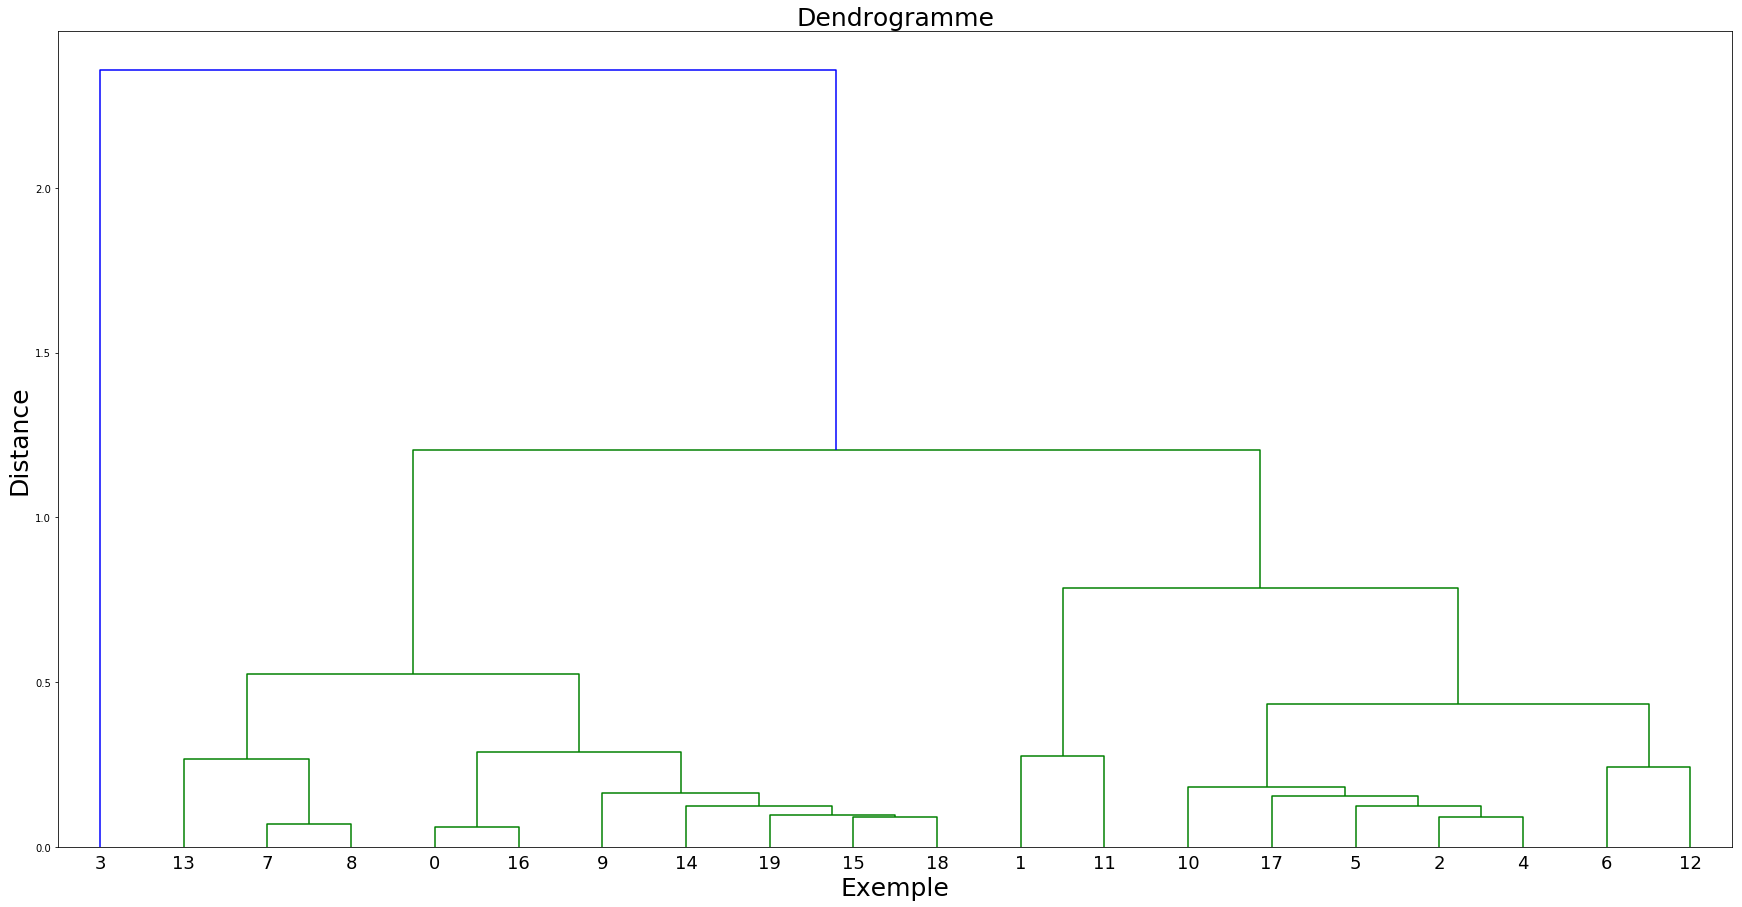


La matrice M_Fusion obtenue (manha):
      janv-11   févr-11   mars-11    avr-11    mai-11   juin-11   juil-11  \
0   0.257067  0.254656  0.268383  0.252964  0.266409  0.265001  0.335786   
1   0.629621  0.647503  0.631767  0.643170  0.650143  0.624173  0.843055   
2   0.469558  0.464912  0.454923  0.464820  0.412754  0.457997  0.621825   
3   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
4   0.453974  0.475034  0.485282  0.468041  0.360817  0.458486  0.615870   
5   0.424861  0.450607  0.443264  0.464433  0.478764  0.470977  0.630758   
6   0.299710  0.306208  0.322175  0.332861  0.327563  0.329047  0.444386   
7   0.093863  0.088259  0.075493  0.086469  0.073857  0.068087  0.120511   
8   0.049529  0.074629  0.071800  0.071521  0.061402  0.059393  0.099142   
9   0.214182  0.251417  0.209743  0.222938  0.156308  0.201323  0.205815   
10  0.493960  0.520243  0.514602  0.505799  0.408644  0.509429  0.697320   
11  0.614641  0.689339  0.708184  0.684021  0.609

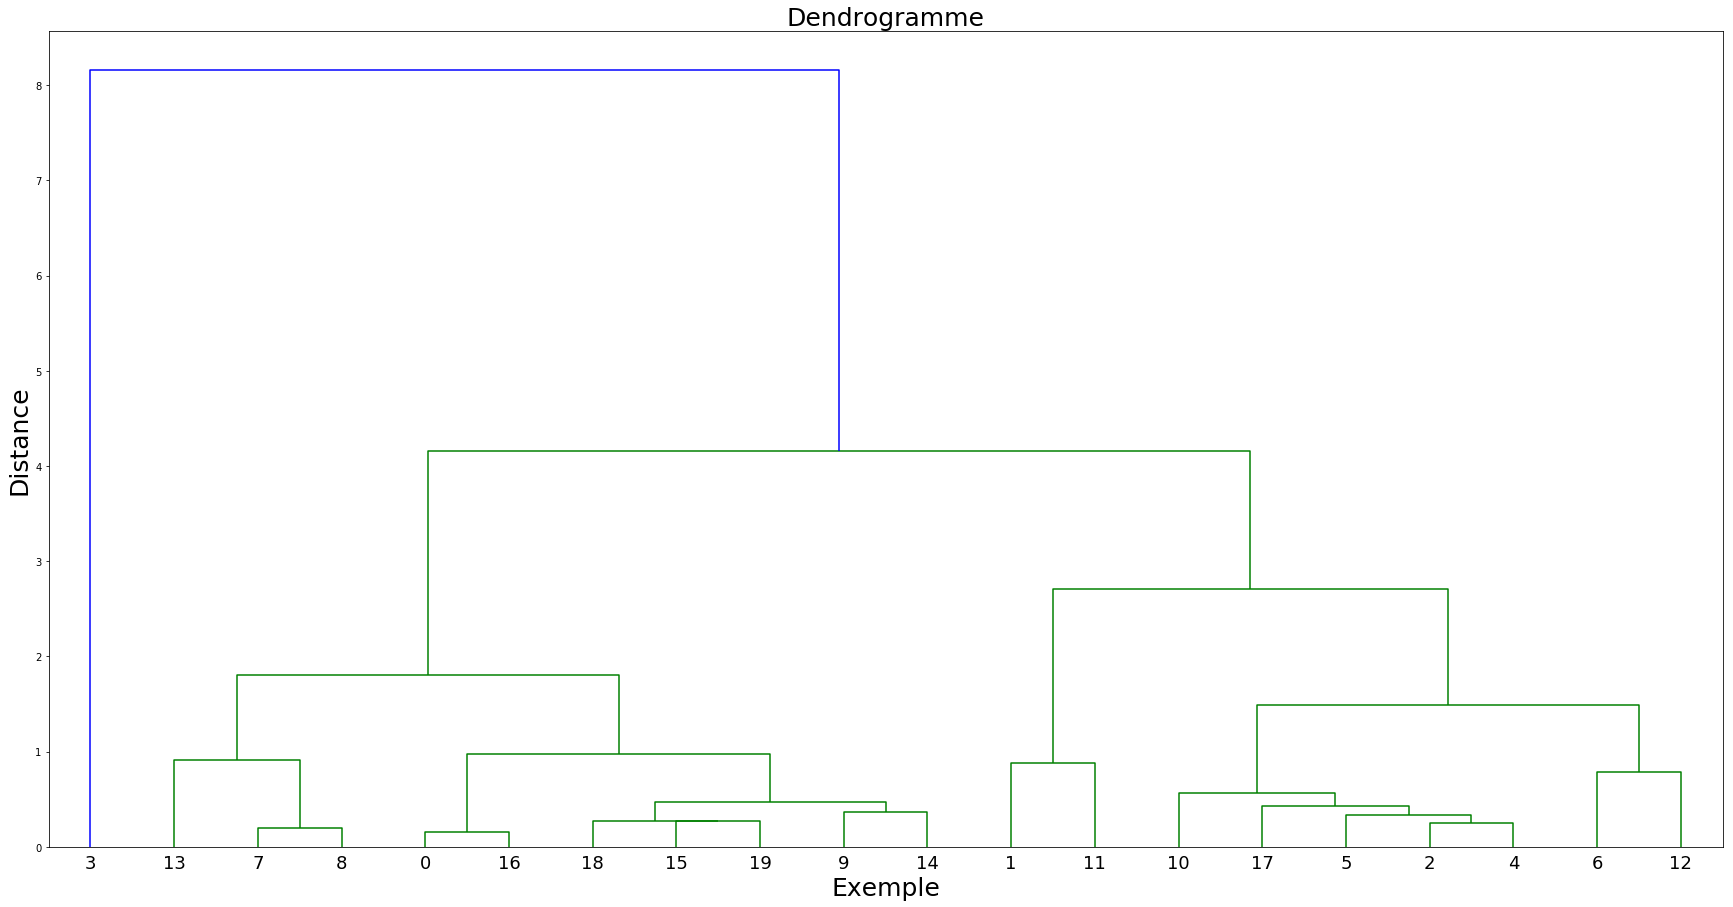

In [689]:
print('\nLa matrice M_Fusion obtenue (eucli):\n')
clustering_hierarchique ('euclidienne',data_T_Paris)
print('=============================================')
print('\nLa matrice M_Fusion obtenue (manha):\n',data_T_Paris)
clustering_hierarchique ('manhattan',data_T_Paris) 

